In [1]:
#Goal: Get data only for ship traffic through oresund strait

import pandas as pd
import sys
sys.path.append('../')

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

import os

/Users/asger/.pyenv/versions/3.13.1/envs/base/lib/python3.13/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


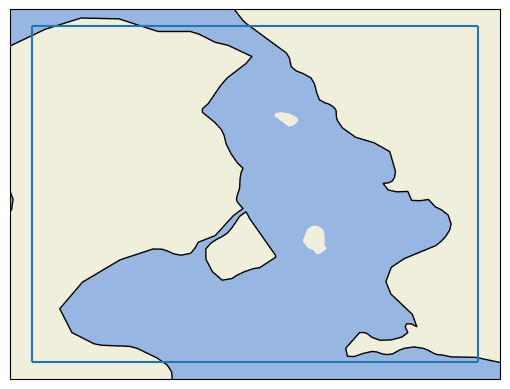

In [2]:
#This is the box that we are interested in
nswe = [56.110689, 55.369532, 12.137468, 13.120240]
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
plt.hlines([nswe[0], nswe[1]], nswe[2], nswe[3])
plt.vlines([nswe[2], nswe[3]], nswe[0], nswe[1])

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)

In [3]:
chunk_size = 10000
chunks = pd.read_csv('../Data/aisdk-2025-01-19.csv', chunksize=chunk_size)
cols_to_keep = ['# Timestamp', 'Type of mobile', 'MMSI', 'Latitude', 'Longitude',
       'Navigational status', 'SOG', 'COG', 'Heading',
       'Ship type', 'Cargo type', 'Width', 'Length',
       'Destination']

chunks = pd.read_csv('../Data/aisdk-2025-01-19.csv', chunksize=chunk_size, usecols=cols_to_keep)

oresund = pd.DataFrame(columns=cols_to_keep)

date = '2025-01-19'
file_name = f"../Data/Oresund/{date}.csv"
if not os.path.exists(file_name):
    for i, chunk in enumerate(chunks):
        boolean = (chunk['Latitude'] < nswe[0]) & (chunk['Latitude'] > nswe[1]) & (chunk['Longitude'] > nswe[2]) & (chunk['Longitude'] < nswe[3])
        oresund = pd.concat([oresund, chunk[boolean][cols_to_keep]], ignore_index=True)
    oresund.to_csv(file_name, index=False)
else:
    print(f"File {file_name} already exists!")

/var/folders/29/jqsnm5js6_sc7663vjsq3mp40000gp/T/ipykernel_40489/1232625625.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  oresund = pd.concat([oresund, chunk[boolean][cols_to_keep]], ignore_index=True)
